In [1]:
import pandas as pd
import numpy as np
from os import path as os_path, getcwd
from sys import path as sys_path
import matplotlib.pyplot as plt


import datetime


from gdax_client import GdaxClient 

In [2]:
max_requests = 350
dt = datetime.timedelta(minutes=15*max_requests)
begin = datetime.datetime(2017, 1, 1, 0, 0) # Change begin date (YYYY/DD/MM/h/min)
end = datetime.datetime(2017, 2, 1, 0, 0)   # Change end date

client = GdaxClient()

In [3]:
df_year = client.get_historical_data(begin, end)
display(df_year)
df_year.to_pickle("data/ETH_USD_2016_2018_15min.pkl")

2017-01-04 03:00:00
2017-01-07 06:00:00
2017-01-10 09:00:00
2017-01-13 12:00:00
2017-01-16 15:00:00
2017-01-19 18:00:00
2017-01-22 21:00:00
2017-01-26 00:00:00
2017-01-29 03:00:00
2017-02-01 00:00:00


,time,low,high,open,close,volume
0,2017-01-01 00:00:00,8.11,8.16,8.16,8.16,378.420945
1,2017-01-01 00:15:00,8.16,8.24,8.16,8.24,252.619480
2,2017-01-01 00:30:00,8.24,8.27,8.24,8.27,237.637246
3,2017-01-01 00:45:00,8.25,8.27,8.27,8.26,109.079011
4,2017-01-01 01:00:00,8.26,8.29,8.26,8.29,270.898827
5,2017-01-01 01:15:00,8.27,8.29,8.27,8.29,280.979249
6,2017-01-01 01:30:00,8.27,8.29,8.29,8.28,84.835125
7,2017-01-01 01:45:00,8.28,8.29,8.28,8.29,393.862555
8,2017-01-01 02:00:00,8.30,8.30,8.30,8.30,11.993290
9,2017-01-01 02:15:00,8.30,8.45,8.30,8.45,964.297451


In [4]:
df_year = pd.read_pickle("data/ETH_USD_2016_2018_15min.pkl")

# Checking for missing data
delta = datetime.timedelta(minutes=15)
for i, row in df_year.iterrows():
    if i < len(df_year.index)-1:
        current_date = df_year.iloc[i]
        next_date = df_year.iloc[i+1]
        if next_date["time"] - current_date["time"] > delta:
            print("No data between {} and {}.".format(current_date["time"], next_date["time"]))
for i, row in df_year.iterrows():
    if i < len(df_year.index)-1:
        current_date = df_year.iloc[i]
        next_date = df_year.iloc[i+1]
        if next_date["time"] < current_date["time"]:
            print("Wrong order between {} and {}.".format(current_date["time"], next_date["time"]))

No data between 2017-01-12 05:00:00 and 2017-01-12 05:30:00.
No data between 2017-01-13 00:15:00 and 2017-01-13 00:45:00.
No data between 2017-01-14 00:45:00 and 2017-01-14 01:15:00.
No data between 2017-01-14 08:00:00 and 2017-01-14 08:30:00.
No data between 2017-01-14 09:15:00 and 2017-01-14 10:00:00.
No data between 2017-01-14 18:45:00 and 2017-01-14 19:15:00.
No data between 2017-01-15 01:30:00 and 2017-01-15 02:00:00.
No data between 2017-01-15 03:30:00 and 2017-01-15 04:00:00.
No data between 2017-01-15 06:45:00 and 2017-01-15 07:15:00.
No data between 2017-01-15 08:45:00 and 2017-01-15 09:30:00.
No data between 2017-01-15 11:30:00 and 2017-01-15 12:00:00.
No data between 2017-01-15 17:00:00 and 2017-01-15 17:30:00.
No data between 2017-01-15 22:45:00 and 2017-01-15 23:15:00.
No data between 2017-01-16 05:30:00 and 2017-01-16 06:00:00.
No data between 2017-01-16 07:45:00 and 2017-01-16 08:15:00.
No data between 2017-01-16 08:30:00 and 2017-01-16 09:00:00.
No data between 2017-01-

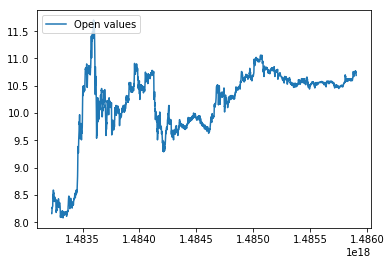

In [5]:
plt.plot(df_year.time,df_year.open, label = "Open values")
plt.legend(loc='upper left')
plt.show()

In [6]:
start = datetime.datetime.utcnow() - datetime.timedelta(minutes=15)
end = datetime.datetime.utcnow()

df = client.get_historical_data(start,end)
display(df)

2018-03-03 17:15:00


,time,low,high,open,close,volume
0,2018-03-03 17:00:00,861.79,862,862,861.81,126.347041
